# Explore SSH model field

In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:33821")
client

<Client: 'tcp://127.0.0.1:33821' processes=4 threads=8, memory=61.46 GiB>

In [26]:
import numpy as np
import ecco_v4_py as ecco
import xarray as xr
import matplotlib.pyplot as plt
import ecco_access as ea
from os.path import join,expanduser

# identify user's home directory
user_home_dir = expanduser('~')

## Open SSH

In [27]:
ssh_shortname = "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4"
access_mode = 's3_open_fsspec'
download_root_dir = join(user_home_dir,'efs_ecco','ECCO_V4r4_PODAAC')
jsons_root_dir = join(user_home_dir,'efs_ecco','mzz-jsons')

In [28]:
ssh_ds = ea.ecco_podaac_to_xrdataset(ssh_shortname,\
                                     StartDate='1992-01',EndDate='2017-12',\
                                     mode=access_mode,\
                                     download_root_dir=download_root_dir,\
                                     max_avail_frac=0.5,\
                                     jsons_root_dir=jsons_root_dir)

In [29]:
drake_pt = ssh_ds.SSH.isel(i=88,j=60,tile=11)
antar_pt = ssh_ds.SSH.isel(i=6,j=70,tile=12)

In [32]:
d_ssh = (drake_pt-antar_pt)

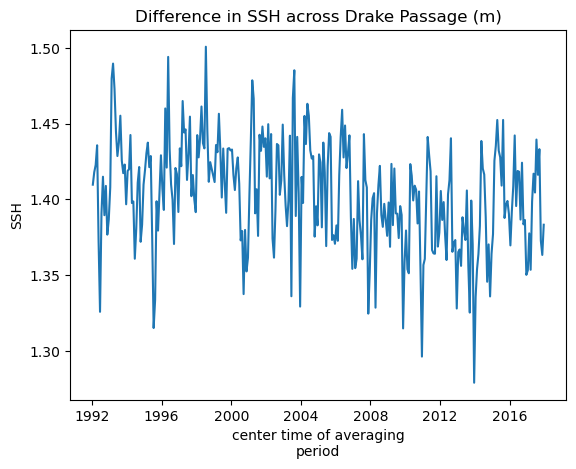

In [35]:
d_ssh.plot();
plt.title("Difference in SSH across Drake Passage (m)");

## Calculate geostrophic flow

v = (g / f) * (∂η / ∂x)

In [66]:
g = -9.81
omega = 7.2921159e-5  # Earth's angular velocity in rad/s
latitude = -58
f = -1.2e-4

In [67]:
# distance along transect
drake_pt.XC.values
drake_pt.YC.values

array(-56.2021, dtype=float32)

In [68]:
from haversine import haversine
dx = haversine((-56.2021,-67.5),(-60.330074,-57.5),unit='m')

In [69]:
transport = (g/f) * d_ssh / dx

In [74]:
# convert to Sverdrups and multiply over rough depth of 1000 m
transport_Sv = transport / 1e6 * 1000

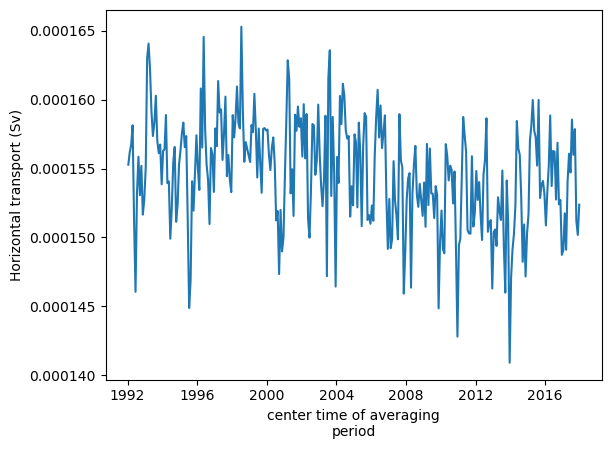

In [76]:
transport_Sv.plot();
plt.ylabel('Horizontal transport (Sv)');

## Plot EMU sampling tool

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/mzahn/emu_samp_m_1_drake_ssh_mask.bin_1_20241016_152835



Reading /efs_ecco/mzahn/emu_samp_m_1_drake_ssh_mask.bin_1_20241016_152835

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/mzahn/emu_samp_m_1_drake_ssh_mask.bin_1_20241016_152835/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/mzahn/emu_samp_m_1_drake_ssh_mask.bin_1_20241016_152835/output/samp.step_312

Plotting sampled time-series ... 


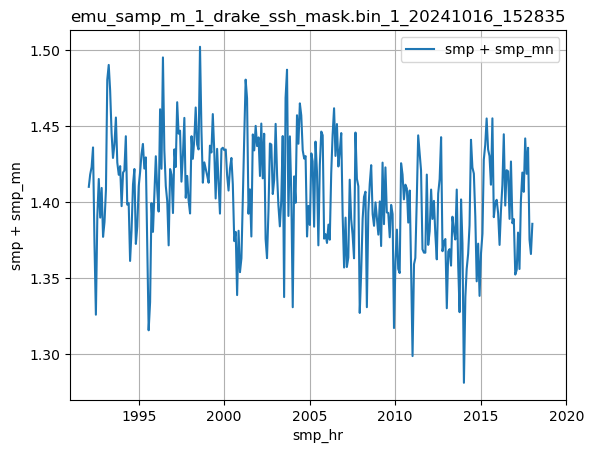


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
hfacc               hfacs               hfacw               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  rf                  
smp                 smp_hr              smp_mn              sn                  
xc                  xg                  yc                  yg                  


In [11]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');